References :
- https://towardsdatascience.com/extracting-twitter-data-pre-processing-and-sentiment-analysis-using-python-3-0-7192bd8b47cf
- https://towardsdatascience.com/with-the-emergence-of-social-media-high-quality-of-structured-and-unstructured-information-shared-b16103f8bb2e
- https://pypi.org/project/tweet-preprocessor/
- https://towardsdatascience.com/another-twitter-sentiment-analysis-bb5b01ebad90

In [24]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import os
import re
from collections import Counter
import glob

from wordcloud import WordCloud

from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import nltk
from nltk.stem import PorterStemmer
from nltk import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

read zomato and swiggy tweets from csv folder (all 45 days of tweets)

In [25]:
swiggy = pd.DataFrame()
for file_name in glob.glob("swiggy/"+'*.csv'):
    df = pd.read_csv(file_name)
    swiggy = swiggy.append(df, sort=False)
swiggy['length'] = swiggy['full_text'].apply(len)

In [26]:
zomato = pd.DataFrame()
for file_name in glob.glob("zomato/"+'*.csv'):
    df = pd.read_csv(file_name)
    zomato = zomato.append(df, sort=False)
zomato['length'] = zomato['full_text'].apply(len)

In [27]:
print(swiggy.shape)
swiggy = swiggy[~swiggy['full_text'].str.startswith("RT")]
swiggy = swiggy.drop_duplicates(subset=['full_text'], keep="first")
print(swiggy.shape)

(8582, 12)
(7088, 12)


In [5]:
swiggy.sample(100)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id,user_mentions,length
78,2019-06-14 19:57:23,2,146,88,@MonoChronica @Ibleed_sarcasm @Appsfizz @Swigg...,0,False,dr_abhi_voice,1139622882475032577,990169391655354368,"['MonoChronica', 'Ibleed_sarcasm', 'Appsfizz',...",197
102,2019-07-10 18:23:42,0,2626,1238,@SwiggyCares Have msgd the care for the second...,0,False,SarkarMania,1149021390877671424,18473303,['SwiggyCares'],91
474,2019-07-10 14:16:41,0,14,173,@SwiggyCares I'm sorry too. I'll delete these ...,0,False,saurabh2806,1148959227999744006,209627710,['SwiggyCares'],52
272,2019-07-02 15:40:22,0,26,44,I will take it into consideration that your re...,1,False,SuryaDebnath,1146081184255840256,176131738,[],279
191,2019-06-02 17:39:02,0,27,90,@SwiggyCares Thanks,0,NaN,Rajendar_Y,1135239411875008513,240131680,['SwiggyCares'],19
427,2019-06-02 15:23:10,1,15,61,@swiggy_in @SwiggyCares\nPlease reply...,0,NaN,NarendraSR1999,1135205222022696960,1096731246724407296,"['swiggy_in', 'SwiggyCares']",39
12,2019-07-02 20:38:50,1,126,42,Really sad @swiggy_in @SwiggyCares https://t.c...,0,False,concern13161846,1146156295520579584,1116569277199306753,"['swiggy_in', 'SwiggyCares']",58
480,2019-06-13 10:48:54,1,38,155,@Avinava18 @swiggy_in @Zomato @UberEats @foodp...,0,False,BhargavKolekar,1139122465232179202,731721755094487040,"['Avinava18', 'swiggy_in', 'Zomato', 'UberEats...",71
315,2019-06-01 16:11:00,2,18422,3483,@dinakaran @swiggy_in Lowe Lintas,0,NaN,ndcnn,1134854872153509888,31103923,"['dinakaran', 'swiggy_in']",33
793,2019-06-01 07:30:23,0,75,151,"@SwiggyCares @swiggy_in Its a simple issue, I ...",0,NaN,dhwanm___,1134723854725668864,3227367283,"['SwiggyCares', 'swiggy_in']",188


In [28]:
print(zomato.shape)
zomato = zomato[~zomato['full_text'].str.startswith("RT")]
zomato = zomato.drop_duplicates(subset=['date','full_text'], keep="first")
print(zomato.shape)
zomato.sample(100)

(8192, 12)
(6516, 12)


,date,favorite_count,followers_count,friends_count,full_text,retweet_count,screen_name,tweet_id,user_id,user_mentions,retweeted,length
0,2019-06-01 23:42:21,0,91,339,"@srikkanthdTOI Totally agree, they look on the...",0,_NMN,1134968457861009408,68654447,['srikkanthdTOI'],NaN,295
681,2019-06-02 10:38:19,0,185,290,@ZomatoIN its really disheartening to see that...,0,mike_captain_7,1135133534652289024,63384435,['ZomatoIN'],NaN,286
805,2019-06-01 09:11:16,0,11020,41,@Name62847800 @ZomatoIN Hi There! \nPlease hel...,0,zomatocare,1134749240024895488,988362975617601536,"['Name62847800', 'ZomatoIN']",NaN,187
14,2019-07-01 20:52:19,0,1,27,@faiz_f99 @zomatocare @Zomato Bro look at my r...,0,Vikas71437659,1145797304164556800,3424025179,"['faiz_f99', 'zomatocare', 'Zomato']",False,73
443,2019-06-03 14:48:20,0,0,9,@zomatocare May I know what action u have been...,0,Sachins81152292,1135558844594081798,1132212327325921280,['zomatocare'],NaN,81
350,2019-07-01 14:51:39,0,349,733,@zomatocare This is the payment details I have...,0,kissore,1145706539396657152,27612828,['zomatocare'],False,71
2172,2019-06-04 06:48:02,0,8,252,@PPadihary @ZomatoIN @Zomato I can't control m...,0,PrituSmarty,1135800358943412224,1131092128296079360,"['PPadihary', 'ZomatoIN', 'Zomato']",NaN,58
525,2019-06-01 14:24:26,0,2,13,@zomatocare @Zomato Order ID: 1660084042,0,soumya_bharathi,1134828053731848192,738664209693609984,"['zomatocare', 'Zomato']",NaN,40
869,2019-06-03 06:11:26,1,5,9,@ZomatoIN Od-1553357640\nYesterday I order fro...,0,rajatgulghane99,1135428760650387456,1029276494659383296,['ZomatoIN'],NaN,221
1721,2019-06-04 10:04:55,0,11020,41,@RajKuma94681249 @ZomatoIN Hi Raj! We are real...,0,zomatocare,1135849905761558529,988362975617601536,"['RajKuma94681249', 'ZomatoIN']",NaN,204


In [29]:
zomato.to_csv('zomato_raw.csv')
swiggy.to_csv('swiggy_raw.csv')

Check lengths of swiggy and zomato text

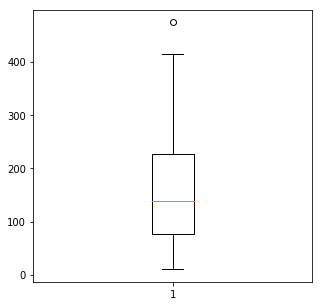

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(swiggy['length'])
plt.show()


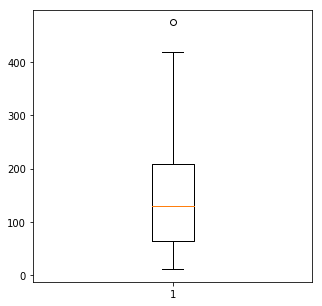

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(zomato['length'])
plt.show()

In [9]:
swiggy['full_text'].head(20)

1     After a long working day, thanks for deliverin...
2     Thank you @swiggy_in for delivering food in mi...
3     @KuffaitMir @swiggy_in Omg I will never use sw...
4     @swiggy_in your customer service sucks, I've b...
5     @SwiggyCares What you mean by apologize is a t...
6     @swiggy_in Sabse bekar company hai meri id nat...
7     @swiggy_in this is the poisionous dal makhani ...
8     @SwiggyCares Oooh really do u want to help. It...
9            Thanx @SwiggyCares https://t.co/stvtDhWqLk
10    @NetflixIndia @Zomato and @swiggy_in  ad on @Y...
11    @SwiggyCares totally discussing first placing ...
12                    @SwiggyCares totally bad services
13    @SwiggyCares I do agree but it's not first tim...
14    @swiggy_in I want my refund because m not gett...
15    @swiggy_in placed order at 11:34 pm. For same ...
16    @swiggy_in Really getting fedup by a billion $...
17    @ZomatoIN @cricketwallah Here is the proof how...
18    @SwiggyCares I received the call from your

<H2>Clean data</H2>

In [10]:
import preprocessor as p

stop_words = set(stopwords.words('english'))
stop_words_list = list(stop_words)

extended_list = []
with open('stop_word_extended.txt') as f:
    extended_list.extend([word for line in f for word in line.split()])

stop_words_list.extend(extended_list)
stop_words_list.extend(['humans', 'water', 'may', 'nice', 'zomato', 'swiggy', 'order', 'food'])
stop_words_list = list(set(stop_words_list))

#remove stop words
def remove_stop_words(text) :
    word_tokens = word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if not w in stop_words_list]
    return ' '.join(filtered_tokens)

#clean tweets for punctuations, numbers, # etc
def clean_tweets(text) :
    print(text)
    text = BeautifulSoup(text, 'lxml').get_text()
    try:
        text = text.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        text = text
    
    text = re.sub(r'@[A-Za-z0-9_]+','',text)  #remove all @mention
    text = re.sub('https?://[A-Za-z0-9./]+','', text)  #remove links
    text = re.sub("[^a-zA-Z\s]", "", text)  #remove all #, numbers, etc non alphabets
    text = text.lower().strip() #lowercase and strip
    text = re.sub(' +', ' ', text) #all double spaces with single
    
    text = text.replace('delivered', 'delivery')
    text = text.replace('deliver', 'delivery')
    text = text.replace('deliveryy', 'delivery')
    text = text.replace('customers', 'customer')
    text = text.replace('guys', 'guy')
    text = text.replace('boy', 'guy')
    
    text = remove_stop_words(text)
    #text = p.clean(text)
    print(text + "\n\n")
    return text

In [11]:
#print original text and clean text
swiggy['clean_text'] = swiggy['full_text'].apply(lambda x: clean_tweets(x))

After a long working day, thanks for delivering an inedible food @SwiggyCares @swiggy_in
long working day thanks deliverying inedible


Thank you @swiggy_in for delivering food in midnight that too wid 50% discount, I really appreciate 🙌 your delivery boy efforts to get my soup delivered at my doorstep. I am having viral fever🤒 &amp; I can't cook hence ordered from #swiggy 2 am.
Keep up the healthy relationship💯
thank deliverying midnight wid discount appreciate delivery guy efforts soup delivery doorstep viral fever cook hence keep healthy relationship


@KuffaitMir @swiggy_in Omg I will never use swiggy in my life .
omg never life


@swiggy_in your customer service sucks, I've been trying to get my coupon processed for the last 30 minutes but your executive is lazy and unhelpful!! Don't see a point to being your super member, would actually prefer @ZomatoIN from now on! https://t.co/wE20j0ZYzt
customer service sucks ive trying coupon processed executive lazy unhelpful point super mem

sadly price exclusive charges apart hideous surged prices additional restaurant chargers delivery charges sad


@SwiggyCares #45237364657 order id.. not deliverd even after an hour.. you are taking 50% of order charges on the name of delivery and hotel charges.. after an hour you can order.. what is it?? You all apps making fool of people..
deliveryd charges name delivery hotel charges apps making fool people


@SwiggyCares Lazy pay anta thank u @SwiggyCares
lazy pay anta thank


@nandhunandamuri @swiggy_in Haa tinna le
haa tinna le


@Jaya_simha_ @swiggy_in Hahaha....sare..thinnaava ledaa
hahahasarethinnaava ledaa


@i_manish7 @UberEats_IND Well the best part is that @swiggy_in has blocked my account on my phone I can't access it from my current device. I used to depend on @Uber_India or @ZomatoIN
best part blocked account phone access current device used depend


@SwiggyCares Such a stupid service from u people
stupid service people


@nandhunandamuri @swiggy_in Andariki reply istunn

fr nth timevn r goin undrstnd dat v save wont ordr outsidewhts wd ds habit deliverying wrong evrytime giving refund delivery charges non refundable


Oh my God! I'm extremely sorry that I didn't open up the box in right way. 😅 That's why I saw just a pizza base. Thank you! #swiggy @swiggy_in The order met my expectations 😄✨ https://t.co/LMkNo2rkX0
oh god im extremely sorry open box saw base thank met expectations


Thanks for Complementary Sample @swiggy_in. 15% Long Leaves? Will Try and Check out the Taste @TGBL https://t.co/bGAjQxQSgP
thanks complementary sample long leaves try taste


@DhooDala @swiggy_in 👍🙏



@SwiggyCares Received call. Thanks
received thanks


@SwiggyCares I didn't get any coupon added till now... 
As saidi in DM add 100 rupees coupon as early as possible
coupon added till saidi add rupees coupon early possible


@SwiggyCares @swiggy_in I ordered food through swiggy but totally wasted as it was too much spicy and bad in taste.customer care not giving proper solut

ghdye


@Taajkha93588455 @swiggy_in Hhdje
hhdje


@Taajkha93588455 @swiggy_in Hhhsh
hhhsh


@Taajkha93588455 @swiggy_in Hhdheh
hhdheh


@Taajkha93588455 @swiggy_in Hhshdh
hhshdh


@Taajkha93588455 @swiggy_in Hdghdh
hdghdh


@Taajkha93588455 @swiggy_in Hdjjd
hdjjd


@Taajkha93588455 @swiggy_in Hhdhrh
hhdhrh


@Taajkha93588455 @swiggy_in Ghrjjd
ghrjjd


@Taajkha93588455 @swiggy_in Ggxhhd
ggxhhd


@Taajkha93588455 @swiggy_in Hhdhhd
hhdhhd


@Taajkha93588455 @swiggy_in Hhdjdh
hhdjdh


@Taajkha93588455 @swiggy_in Gfhdh
gfhdh


@Taajkha93588455 @swiggy_in Hhfhf
hhfhf


@Taajkha93588455 @swiggy_in Tyshd
tyshd


@Taajkha93588455 @swiggy_in Hdhhf
hdhhf


@Taajkha93588455 @swiggy_in Hhdhdh
hhdhdh


@Taajkha93588455 @swiggy_in Hhdjd
hhdjd


@Taajkha93588455 @swiggy_in Gdhfh
gdhfh


@KokaneGaurav1 @95Pizza @swiggy_in @SwiggyCares @WeAreSwiggy @95pastanpizza God dammit swiggy you giving Rs.100/- coupon for this food. Hey Swiggy I give you Rs.1000/- can you eat cockroach ?😡😡 https://t.co/VKSOZC0Dmx


wonder many must fallen sweet trap


@SwiggyCares It was pleasant experience this time. Thank you!
pleasant experience time thank


@SwiggyCares Scrumptious, 7 bungalows. You have ruined my hunger for breakfast.
scrumptious bungalows ruined hunger breakfast


@SwiggyCares Definitely not my idea.
idea


@SwiggyCares @swiggy_in @UberEats_IND delivery people are delivering food in this scorching heat, I request restaurants and the customers to provide some drinking water when they reach you. I did the same. #RespectDeliveryGuys
delivery people deliverying scorching heat request restaurants customer drinking reach respectdeliveryguy


@swiggy_in @mcdonaldsindia Asked for replacement. Repeated heating instructions twice. 

Still got the same cake freezer cold, rock hard cake.
asked replacement repeated heating instructions twice cake freezer cold rock hard cake


Here's to another Sunday with @swiggy_in fucking up my order, my mood, and my mental health with their shitty argumentative agent

minute issue resolved hn waiting refund selfish fake company late resolution resolution


@SwiggyCares @swiggy_in instd of resolving issue, why using cheap tactics.1st order has been spoilt while delievering. cust care suggsted go for replcmnt,thought they ll recover it on tym,but 2nd order takin forevr.Spent 2 hours from the beginning, askd to cancel, but no refund.
instd resolving issue using cheap tacticsst spoilt delievering cust care suggsted go replcmntthought recover tymbut nd takin forevrspent beginning askd cancel refund


Hi @jagograhakjago  please look at the following bills by @SwiggyCares @swiggy_in 

This has happened multiple times and probably with multiple customers. On asking the reason they say that it's delivery charge but even if we consider that, it doesn't add up. Please take action. https://t.co/sp76sn8TGS
hi following bills happened multiple times probably multiple customer asking reason say delivery charge consider doesnt add


@swiggy_in I want to register as

sent


@SwiggyCares cont'd... When I speak via chat to customer support, I am shocked at the lack of ownership by Swiggy by citing Dominos is just their partner.
contd speak via customer support shocked lack ownership citing dominos partner


@SwiggyCares I placed an order for Dominos via the app. Order # 4297053209. I was called by the Dominos executive informing that they are cancelling the order because they don't deliver to my area. Now Swiggy shows that the order has been delivered but that is not true.
dominos via app called dominos executive informing cancelling delivery area shows delivery true


@SwiggyCares Thank you for your support and good service. Finally I got to know why swiggy is A #BILLION $DOLAR #COMPANY 😅👍
thank support good service finally billion dolar company


1/5 #Review on @swiggy_in by chaitanyajayanthi : Worst-Service - https://t.co/LoV4IPRw2Q
review chaitanyajayanthi worstservice


@swiggy_in My past experience is forcing me to not to believe @SwiggyCares .

interested replaced cancelled wasted enough resources continue


@swiggy_in @webchutney wins a Blue Elephant in Use of Interaction for ‘Voice of Hunger’ #KCA #ItCarriesWeight https://t.co/3iseuMbieX
wins blue elephant interaction voice hunger kca itcarriesweight


@tejasvgupta1 @zomatocare @ZomatoIN @Zomato @swiggy_in You r right. We should go for swiggy only.
r go


@SwiggyCares Every dish is minimum higher by 20 rupees and additional delivery charges as well. How come you are charging over on top of the menu price? You have to declare if the prices are higher else this is cheating customers
every dish minimum higher rupees additional delivery charges come charging top menu price declare prices higher else cheating customer


@SwiggyCares 42472699846 .... Call me at 9599427114



@tejasvgupta1 @ZomatoIN @Zomato @swiggy_in HI Tejasv! That should not have happened! Kindly share your order ID with us and we will get this checked for you right away. ~Ary
hi tejasv happened


@swiggy_in @w

whats high demand price people looting money continue wont care worst experience


@patelyaash2000 @swiggy_in This was in 2017. It is changed again
changed


@SwiggyCares swiggyit50 coupon not working even on restaurant where it says use swiggyit50 coupon for 50% upto blah blah... Coupon usage limit reached
swiggyit coupon working restaurant says swiggyit coupon upto blah blah coupon usage limit reached


@SmokingSkills_ @swiggy_in Can't imagine anyone ordering Rajma-chawal from Swiggy!
imagine anyone rajmachawal


@SwiggyCares @ARUNKUMARROY0 Don't expect any help from swiggy... They are pro in such services
expect pro services


@swiggy_in pay your executives well, no one is delivering
pay executives deliverying


@swiggy_in somebody needs to own up for the mistakes and casual attitude. I am tired of multiple misses from you. Is this how #Super operates? Screw customers and take money?
somebody needs mistakes casual attitude tired multiple misses super operates screw customer money




focus canned responses nothing customer


@SwiggyCares @rajeshashar Stop giving bot replies. Atleast read the tweet properly. We are interested in knowing what action was taken.
stop giving bot replies atleast read tweet properly interested knowing taken


@sjalan @swiggy_in 😊 delivering in aerocity , vasant vihar and vasant kunj currently. Hopefully @swiggy_in will expand the circle soon. We look forward to welcoming you to Soul Pantry at Andaz Delhi till then
deliverying aerocity vasant vihar vasant kunj currently hopefully expand circle soon forward welcoming soul pantry andaz delhi till


@AndazDelhi @swiggy_in Ah, my location was set to Sushant Lok in Gurgaon, that's why I guess it didn't show up
ah location set sushant lok gurgaon guess show


@SwiggyCares unwanted housefly in food. https://t.co/WcZnka1laU
unwanted housefly


@prs_paras @swiggy_in इनको इतनी गालियां दूंगा की अनुराग कश्यप भी शरमा जाएगा 😡😡😡😡😡🙄🙄😂😂😂😂😂



@FasterMK @swiggy_in अब फिर से सब समझाना पड़ेगा।
भूल गए होंगे इत

faketan customer care escalation team refunded never single penny consumer court awaits


@SwiggyCares @balajicts30 Don't expect any resolution from them
expect resolution


#after 39Hrs.
Still @SwiggyCares @swiggy_in are unable to resolve issue.
Mr.@SwiggyCares do u guys think that all Indians are same like @ArvindKejriwal who can turn easily so Sorry boss. 
But I m not going to Stop myself.
Until I get results.
#swiggy_dhokhebaz_Hai https://t.co/4lMWMy6aE0
hrs unable resolve issue mr guy think indians turn easily sorry boss going stop results swiggydhokhebazhai


@SwiggyCares ordered non veg pizza got veg and why should I be paying more and the food from my last 2 restaurants were horrible but I let it go but this time Im really feed up https://t.co/1FIITdtJSS
non veg veg paying restaurants horrible let go time im feed


@swiggy_in  Offer என்று சொல்லி மக்களை ஏமாற்றுகிறது don't trust swiggy delivery
offer trust delivery


@SwiggyCares @swiggy_in I ordrd from a bakery/cafe called Chai 

chor


@swiggy_in chor1
chor


@swiggy_in chor
chor


@renaissance1221 @swiggy_in Got you in DM , assisting you there.

^Amisha
assisting amisha


The advertisement of @swiggy_in is way more entertaining than the lousy batting of Pakistan.
@StarSportsIndia @cricketworldcup #ausvpak #CWC19
advertisement entertaining lousy batting pakistan ausvpak cwc


@swiggy_in you got the worst service. Atleast get your map corrected.
worst service atleast map corrected


@swiggy_in @SwiggyCares https://t.co/N7SKQCyhWr



@harshamjty @swiggy_in @SwiggyCares  feeling sorry for being your exclusive partner for even small menu updates i have to wait for months and today for your team has switched off my major selling items giving me huge finacial loss who will bear this loss? Rest id 26297 20788 5300
feeling sorry exclusive partner small menu updates wait months team switched major selling items giving huge finacial loss bear loss rest


@swiggy_in pathetic food delivered..pls initiate refund
pathetic d

uninstalled pathetic services


@SwiggyCares This is they Bribe us?  🤷‍♂️ Have I asked for this?
I asked u something else u r giving me something else.  🤷‍♂️🤷‍♂️🤷‍♂️
100rs? Take 200rs from me and improve your services without any terms and conditions.  💥💥💥💥 https://t.co/HExueLTPsz
bribe asked asked something else r giving something else improve services terms conditions


@swiggy_in delivery charges: 20

applying coupon: -50

new bill: 
restaurant packaging charges:20
delivery charges: 30

LMAO
delivery charges applying coupon bill restaurant packaging charges delivery charges lmao


@swiggy_in It's been almost more that 50 days still I didn't get the refund. I had checked with you Customer care service almost 3 times but there is no response.
Are you earning profit interest on my money?
almost refund customer care service almost times response earning profit interest money


@SwiggyCares No one ready to talk and resolve still, they have done something or blocked me now so that i can't

friend relatives tantion bcoz many ordee cansle ny delivery man rip reason accident many citys


@SwiggyCares I Didn't receive my Order #45070616480
It is showing as delivered
But I didn't receive it
Very Frustrated Cheated by Swiggy
receive showing delivery receive frustrated cheated


@Amanesiac @swiggy_in Account &gt; My Account &gt; Manage Addresses
account account manage addresses


@SwiggyCares This is the standard reply that I have seen umpteen number of times! Please have some variation than cut and paste!!!!
standard seen umpteen times variation cut paste


@SwiggyCares I got 2 pieces of paneer, and lots of watery gravy....raised a complaint, customer service is not doing much, apart from cascading my feedback.
pieces paneer lots watery gravyraised complaint customer service apart cascading feedback


Hi, I haven't heard back from ?
Again it will take 72hrs what?
@SwiggyCares @swiggy_in https://t.co/Lexb6LjbsO
hi havent heard hrs


@BeautifulBluru @SwiggyCares They are not hun

first stop fooling customer offers


@PresidentRwanda @Olacabs @Uber_India @swiggy_in Yes..
yes


@SwiggyCares Issue resolved
issue resolved


@SwiggyCares Swiggy Ka Swag 😄

Thanks Moumita, it was an brilliant idea I did apply. 😋😋
ka swag thanks moumita brilliant idea apply


Dear 
@Olacabs
, 
@Uber_India
 &amp; 
@swiggy_in 
I respect my religion &amp; love it a lot.
Don't send any muslim cab driver &amp; muslim food delivery executive at my place from tomorrow onwards - RT

#HinduPledge
dear respect religion love lot send muslim cab driver muslim delivery executive place tomorrow onwards hindupledge


Absolutely abysmal experience with @swiggy_in @SwiggyCares 
Ordered a chicken thali (#45159963482) from Homely and surprise surprise, there's just one bit of chicken in the entire plate. All in the while, uncooperative customer support sending automated responses. #SwiggySucks https://t.co/srQaU0CSAi
absolutely abysmal experience chicken thali homely surprise surprise theres bit chicken 

wait till upload assistance guy gave


@peppertripin @swiggy_in @Zomato Always. They need to be tipped always.
always tipped always


And moreover @swiggy @SwiggyCares 

Incompetent customer service. I will forward you the chat if need be
moreover incompetent customer service forward


@SwiggyCares Burger King delivers there order in a paper bag,is it right to charge 30 rupees for that?
burger king deliverys paper bagis charge rupees


@SUBWAY @SubwayIndia @SwiggyCares @swiggy_in 

This is to highlight the pathetic delivery experience I have faced 3rd time while ordering from Subway. 

Ordered salad and ice tea but received lemon drink

Instructed to put Lettuce less
But received a salad on a bed of lettuce https://t.co/uODDWJLP15
highlight pathetic delivery experience faced rd time subway salad ice tea received lemon drink instructed put lettuce less received salad bed lettuce


@zomatocare @Zomato @nsitharaman @Zomato @zomatocare @swiggy_in @SwiggyCares Is there no regulations to con




@SwiggyCares I would like to inform you that I have raised a concern yesterday only however what I get in reply https://t.co/X2umKD1cIH
inform raised concern yesterday however


@rohitadhikari92 @swiggy_in Chillll.. They have that before World Cup too
chillll world cup


@SwiggyCares You are wasting my time and money fucking swiggy shit.
wasting time money fucking shit


@SwiggyCares Wait, what are you saying? #EnglishMastery
wait saying englishmastery


@SwiggyCares Fuck off swiggy the bitch app.
fuck bitch app


@SwiggyCares What to do with your sorry will i get my money back. 
What the hell are you talking man ,why are you wasting my time. 
I want my money.
sorry money hell talking man wasting time money


@swiggy_in hi guys, why has the upi option miraculously disappeared from my ios app? The option doesn't exist anymore.
hi guy upi option miraculously disappeared ios app option doesnt exist anymore


@SwiggyCares I want my money
money


@SwiggyCares And no response post that! H

In [12]:
#print original text and clean text
zomato['clean_text'] = zomato['full_text'].apply(lambda x: clean_tweets(x))

@zomatocare @ZomatoIN Order No 2019229017 this is the order Id that I have.
This is the first time I am having this kind of trouble with Zomato have never faced the issue like this even you guys can check the chat I’ve always appreciate the good food, do look into it.
Hope you understand
Kuldeep Singh
first time kind trouble never faced issue guy ive always appreciate good hope kuldeep singh


When I asked them where it is articulated that dishes more than Rs.1k is not available under gold offer. They openly said, it is not articulated anywhere. Meaning @ZomatoIN is cheating in daylight by not giving me the gold membership privilege which I bought for Rs.1300. -Part 5
asked articulated dishes rsk available gold offer openly articulated anywhere meaning cheating daylight giving gold membership privilege bought part


@idk_umf @ZomatoIN Hi There! We apologize for the goof up. Please share the order ID so that we could get this checked for you. 🂡SS
hi apologize goof ss


@Sud843 @ZomatoIN

pathetic things earnings


@zomatocare I am still on chat with your colleague and he is not in a mood to help. Thats why I have approached Twitter I need full refund for all inconvenience caused it has been a night mare will never use Zomato ever again
colleague mood approached twitter full refund inconvenience caused night mare never ever


@zomatocare @Zomato For today 1771254983 and yesterday it was 1557219909.
yesterday


This is what I am receiving zomato after paying full amount and ur customer care is telling me to mail whole issue again and explain them what is happening.  Restaurant has accepted its mistake and same mistake is also accepted my delivery partner. @zomatocare @ZomatoIN @Zomato https://t.co/Kk25NzjMGZ
receiving paying full amount customer care telling whole issue explain happening restaurant accepted mistake mistake accepted delivery partner


@zomatocare See replies pathetic https://t.co/VepyCVYYTy
replies pathetic


@zomatocare @ZomatoIN By mistake cash on deliv




@zomatocare Whats the update? Its been 3 days now and received no callback
whats update received callback


@ZomatoIN definitely some messed up coding and testing on your app. 
1. The match predictions can be done till 8:30 PM but if you rate the valet and restaurant before that then you won't be able to predict for the match. This should be clearly mentioned in T&amp;C.
messed coding testing app match predictions done till rate valet restaurant wont able predict match clearly mentioned tc


@chacha_ninja @MODIfiedVikas @Olacabs @Uber_India @swiggy_in @ZomatoIN @UberEats They charge you when you cancel.
charge cancel


@Taeionysus @ZomatoIN @Zomato Uber eats use karo. Match wali offer hogi
uber eats karo match wali offer hogi


@ZomatoIN order id 1710506858 all burnt paranthas were non eatable...pl refund entire order amount to source a/c @zomatocare @NupurSGarg
burnt paranthas non eatablepl refund entire amount source ac


@azharshaikh000 @ZomatoIN @Zomato Hey Azhar! Never wanted t

chai never


@ZomatoIN received wrong order today ,after giving my feedback no response from @Zomato , https://t.co/Ghu1YSV9y8
received wrong giving feedback response


@zomatocare @Zomato @ZomatoIN https://t.co/MlBKlS2LXc



@ZomatoIN @zomatocare @deepigoyal It's been 12 days now. Your team members are treating the customer like a money bag. You guys are really money oriented. After taking order you never respond back properly
I haven't got any resolution. Plus your team member disconnected the call. And never called back again.#poor
team members treating customer money bag guy money oriented never respond properly havent resolution plus team member disconnected never called againpoor


3 -
received the worst agent who didn't care to reply to my query let alone solve issue. When I was about to quit Zomato forever, a new agent Annu managed to get me give you guys another chance by going out of her way.Order I'd : 1398237446 #zomato @ZomatoIN @Zomato @zomatocare https://t.co/BjdvIaZmL6


seriously bad guy customer service


@zomatocare 1216763042



@zomatocare This is another instance where no status of my order since an hour and u guys are not responding me . I was like forced to order my food again from swiggy platform . Pls cancel my order m not going to recieve it .  Order no for your reference : 1025486341 https://t.co/uKasu1mywV
another instance status since guy responding forced platform cancel going recieve reference


@zomatocare @ZomatoIN @Zomato 
Today also same issue what I have faced yesterday
Delivery location is different 
Can any one assist what the hell is going on https://t.co/OCzaQLz4tU
issue faced yesterday delivery location different assist hell going


@zomatocare Here u go Shared whatever I had
go shared whatever


@zomatocare I want the last issue and today's issue resolved ASAP. I won't spare you guys if it's not resolved by today.
issue todays issue resolved wont spare guy resolved


@zomatocare 1575195118 &amp; 1393319273



@zomatocare What

th


@zomatocare I didn't get any reply 9742419125



@ZomatoIN First refund my money ffs.
first refund money ffs


Dear @swiggy_in i had to cancel an order couple of months ago bcoz u were not able to deliver my order even after one hour of placing it. And now i am not placing any order on ur app bcoz u r charging me a fees of 75 rs. So everytime i am gng to @ZomatoIN
dear cancel couple months ago bcoz able delivery placing placing app bcoz r charging fees everytime gng


@ArvindKejriwal You are giving shelter to the inhuman fraud cheater @deepigoyal @ZomatoIN @zomatocare 
You have to face this in upcoming Elections
giving shelter inhuman fraud cheater face upcoming elections


@zomatocare I do not want to receive any SMS from you. I uninstalled the app long back. This is raised multiple times. How can we stop this ? @DoT_India @deepigoyal
receive sms uninstalled app long raised multiple times stop


@ZomatoIN That app should also deliver the ice creams when its hot outside..... Who's

heyany response


@dipraman1611 @ZomatoIN Hey Dipraman! That seems really awful. Please help us with the 10-digit order number and we will get this checked from our end.
^BG
dipraman seems awful digit bg


@NehaNair @ZomatoIN Hey Neha! That seems like a temporary issue in the area, as all the restaurants are shut down due to som unusual circumstances. Don't worry, we will be back soon.
^BG
neha seems temporary issue area restaurants shut due som unusual circumstances worry soon bg


Sharing the screenshots of the revert received from @zomatocare . They are refusing to refund and also not getting the order delivered which is still present with the delivery boy. https://t.co/AvxQGO3AkO
screenshots revert received refusing refund delivery present delivery guy


@Khan_umair_ @ZomatoIN @Zomato Hey Umair! Apologies for the delay. we will be reaching out to you shortly.
^BG
umair apologies delay reaching shortly bg


@zomatocare @ZomatoIN @Zomato 1185668881. Call me ASAP.



@zomatocare @Zoma


@ZomatoIN Last night, your delivery boy refused to come at my location as it was far for him and you guys messaged me that you’ll pay the restaurant on my behalf and will adjust the amount in my next order.
Matlab galti karo tum aur bhugtu main? Kyon bhai??
night delivery guy refused come location far guy messaged youll pay restaurant behalf adjust amount next matlab galti karo tum aur bhugtu main kyon bhai


@zomatocare @deepigoyal It's been more than 7 days now still there is no reply. This is how zomato shows customer obsession.
shows customer obsession


@zomatocare Stale food received from Fu.D. Order Number #1352532412 When asked for refund the bot said will reduce the rating of food. Refund my money
stale received fud asked refund bot reduce rating refund money


I reviewed Maffy's - Pan Arabian Bistro and rated it 4/5 on @ZomatoIN #LoveFood https://t.co/bQqPMmUlzy
reviewed maffys pan arabian bistro rated lovefood


@YourStoryCo For @ZomatoIN For some better marketing and Strat

investment invest part support worst customer care thing surely beating


@Amarkarthi I gave up bro. @SwiggyCares doesn't care! neither does @zomatocare
gave bro doesnt care neither


@Zomato @zomatocare @ZomatoIN 
Again the same thing happened on 2nd June. Ordering dinner from zomato is a waste https://t.co/paVT3rZCTQ
thing happened nd june dinner waste


@tejvardhan_c @zomatocare Faasos are looters actually!!
faasos looters actually


@zomatocare @ankita_umbre @ZomatoIN @Zomato Same is done with me .They are not able to handle customers.
done able handle customer


@Zomato @ZomatoIN @zomatocare  zomato stared looting people by unethical  way. 
Sorry to say but one of worst customer care service experience. Need clarification  on this. https://t.co/YjPv48qQmH
stared looting people unethical sorry say worst customer care service experience clarification


@zomatocare @Zomato Hi @FinMinIndia,
Zomato has been selling customers' data to its partners.
Now they have been contacting me witho

hi vishal wanted serve mind ss


@prafull9236 @zomatocare @ZomatoIN Toomany indians to care for as customers by every brand out there ! Every brand almost will make u go through this...
toomany indians care customer every brand every brand almost make go


@ZomatoIN Charging Rs 144/- for an order of Rs 84/-. Time to be fair in your dealings. Order ID: 1282082914. https://t.co/ifrE4Kxdpx
charging time fair dealings


@zomatocare @ZomatoIN @Zomato  @BurgerKing wtf is this ? i order this nd wht uh gave ? i specially mention tht do not afd vegetables in my order why did you add ? wht the hell is this ? https://t.co/4f0NlKT6Wy
wtf nd wht uh gave specially mention tht afd vegetables add wht hell


@CMOGuj @ZomatoIN @HavmorIceCreams 

Please check and take action https://t.co/vaEwPO8wVr



@prafull9236 @zomatocare @ZomatoIN This will be the only use-case for twitter eventually 😂
usecase twitter eventually


@prafull9236 @Zomato @ZomatoIN @zomatocare @ZomatoLB @ZomatoUAE @ZomatoAUS Zomato is t

received imaginary given proof initiate refund dumb


@zomatocare Please do that. Thanks
thanks


@solomonsenji @Harshaits @zomatocare @Zomato @ZomatoIN @deepigoyal To top this all, call it arrogance or sheer lack of common sense, I get a message asking if I liked the customer service and how will I rate them!!!!
top arrogance sheer lack common sense message asking liked customer service rate


@zomatocare going to make a account on your platform today i saw promotion on YouTube that 50% off on 1st five order can you please share the coupon code
going make account platform saw promotion youtube st five coupon code


@zomatocare @sudhiru74929815 Nice work...  response level super
work response level super


@zomatocare Order from Pind Punjab.
Placed on 26th May at 09:07 PM.
#1478047565 where is my refund, you people cancelled my order by saying out of restaurant delivery area and not giving my money back. For this I need to tweet . Disgusting Zomato service.
pind punjab th refund people




@Zomato @zomatocare https://t.co/CPYtDEfd01 https://t.co/qIXj1xdvi1



@Prince97997752 @ZomatoIN @zomatocare @Zomato But they prepared their money
prepared money


@zomatocare Let's see... Lunch order kiya tha, lagta hai issue resolve hote hote dinner hi karna padega direct, thanks @ZomatoIN bhukha rakhne k liye 😢😢
lets lunch kiya tha lagta hai issue resolve hote hote dinner hi karna padega direct thanks bhukha rakhne k liye


@zomatocare @rahil24jain I was told 45 credits will be added to my account but yet not added.
credits added account added


@Infiniteincyash @zomatocare @deepigoyal Sahi bol rahe ho yaar, koi faeda nahin dhai ghante honeko hai, na koi restaurant wala respond kar raha hai call ka, na refund aa raha hai
sahi bol rahe ho yaar koi faeda nahin dhai ghante honeko hai na koi restaurant wala respond kar raha hai ka na refund aa raha hai


@zomatocare @Zomato @ZomatoIN @deepigoyal Company like @Zomato should be banned  . Cheaters
company banned cheaters


@ZomatoIN The

reviewed laughter chapter cafe rated lovefood


@zomatocare hi Team,  I have raised a complaint but unable to get any update. DM you as well plz check and reverse
hi team raised complaint unable update reverse


@zomatocare @zomatocare @Zomato @ZomatoIN No response
response


Its very annoying to recieve daily call from @ZomatoIN for buying @ZomatoGold membership. I already have membership. If you want me to have more membership, donate it for free. I will be more than glad to accept a dozen of them.🤣
 #StopBullying #BoycottZomato
annoying recieve daily buying membership already membership membership donate free glad accept dozen stopbullying guycottzomato


@zomatocare My number is same 7007816780
You can call me at any time
time


@zomatocare @Zomato @ZomatoIN ...and I still want to know if you gave this feedback to the restaurant after your checks. Did you do anything, @Zomato @ZomatoIN ?
gave feedback restaurant checks anything


@Zomato @zomatocare I ordered briyani but chicken in

nights delivery return money


@Arora_Saab02 @Zomato @ZomatoIN @zomatocare @UberEats has emerged as a better option
emerged better option


@Zomato @zomatocare @ZomatoIN https://t.co/6n7Uxc8PsR https://t.co/O5YKrMye5A



@zomatocare You should really start seeing what your delivery guys are doing now a days. Continuously lying. Not updating whether they have reached the restaurant or not . Not updating whether they are out for delivery or not.
start seeing delivery guy continuously lying updating whether reached restaurant updating whether delivery


@ZomatoIN @CarryMinati Making money in delivery charges and not delivering on address.. .. so would like to say .. 
Deliver for what you have charged. You can , can't you? https://t.co/VszsLRfTA9
making money delivery charges deliverying address say delivery charged


@ipsvipul_ @ZomatoIN @CarryMinati Sir, You look already fit..
sir already fit


@zomatocare @deepigoyal I recieved the same message on mail also..  But nothing happened.
And 




@ZomatoIN @zomatocare 90% times zomato delivery gives regret filling. N in case of prepaid % gets increase. Never order prepaid in zomato. Check order in case if COD before payment
times delivery gives regret filling case prepaid gets increase never prepaid case cod payment


@zomatocare @ZomatoIN I didn't order from laavani tadka hotel since I'm resident of South Mumbai and hotel location is kandivli, got below https://t.co/3Z3Z6A9VJ6 it by mistake you guys send me summary?Or some one fooling with you with fake email I'd or account? https://t.co/3RdpkteqIF
laavani tadka hotel since im resident south mumbai hotel location kandivli mistake guy send summaryor fooling fake email account


@ZomatoIN do you expect a customer to wait for 45 min to chat with the zomato agent to file a complaint ? The agent connects and waits for 5 min and leaves. What a poor service !
expect customer wait min agent file complaint agent connects waits min leaves poor service


@zomatocare 1304274659. We got

guy worst customer service ever literally everytime land trouble custom service pity always replies half never clears issue btw


Hey @Zomato  can u replay? @ZomatoIN
replay


@zomatocare I plcd duplicate order by mistake.I want to cancel one.I've talked to rstrnt they're not preparing 2nd order. when I'm trying to cncl ur app is deducting Rs158 out of Rs 238. that's highly unfair. I started chat with CC.. now even cancellation option is not available
plcd duplicate mistakei cancel oneive talked rstrnt theyre preparing nd im trying cncl app deducting highly unfair started cc cancellation option available


@ZomatoIN Would you please work on your delivery options?? Have been waiting for my order since the last two hours and cancelling the order is what your 'virtual' customer care suggests. Yesterday too I had the same issue and surprising got only one of my ordered item.
work delivery options waiting since two cancelling virtual customer care suggests yesterday issue surprising item




unfortunately offers currently running renewals app guide case


@ZomatoIN  Thanks for the free @AmazonEchoIndia Echo Dot as a part of your referral program.

It's good to see organizations rewarding the loyal customers who are spreading a good word!

- A Happy Zomato Gold member

#freebies #zomatoGold #EchoDot https://t.co/ewiQ3Da56U
thanks free echo dot part referral program good organizations rewarding loyal customer spreading good word happy gold member freebies zomatogold echodot


@NabheWalaRaman @swiggy_in @ZomatoIN fr network issue hona.?
fr network issue hona


@subashdangol @ZomatoIN Hi Subhash! Apologies for the ill experience! Please help us out with your order ID and we will get this checked for you right away. ~Ary
hi subhash apologies ill experience


@Iamsidmish @Zomato @ZomatoIN Hi @Iamsidmish, Apologies for this! 
Could you please send us your contact details and other details of the call on gold@zomato.com? We shall get this checked asap.
hi apologies send contact go

rd many restaurants


@zomatocare @ZomatoIN https://t.co/7wY7wndRJR



@ZomatoIN My order id 1216594256 against which I have request number 20274951. I ordered food which was not delivered to me as it was cancel by zomato while following the protocol of three missed call though the customer is standing in front of the delivery boy. #DeliveryDenied
request delivery cancel following protocol three missed though customer standing front delivery guy deliverydenied


@shekhar_3088 @Zomato @ZomatoIN Thanks for sharing your order details. We will get in touch with you to discuss this further -AU
thanks touch discuss au


@zomatocare @Zomato @ZomatoIN Order- 1493183147

Check conversation with Chat Agent as well. He admitted that it was Zomato's mistake but he can't refund.
conversation agent admitted zomatos mistake refund


@ZomatoIN @zomatocare



@zomatocare m waiting for ur response.. Could u pls check my dm n call me.. Pls
waiting response


@zomatocare I think asap means as slow as poss

hi awaiting hv relied


Mumbai is burning, try stepping out for 2-min and u turn red! 

A small gesture which we can all do.....pl offer water to every single delivery boy who comes to your home! Nothing more noble than that 🙏
@Zomato @ZomatoIN @narendramodi @RahulGandhi @iamsrk @BeingSalmanKhan @ndtv https://t.co/ZJgMgk6zjh
mumbai burning try stepping min turn red small gesture dopl offer every single delivery guy comes home nothing noble


@zomatocare y imposing hindi?
Zomata delivery persn's profile says he knows kannada but not even a single word he spoke in kannada. 
Also no hindi people never tried to speak a single word in kannada
while surviving in karnataka. Why cant learn kannada
#TNAgainstHindiImposition
imposing hindi zomata delivery persns profile says knows kannada single word spoke kannada hindi people never tried speak single word kannada surviving karnataka kannada tnagainsthindiimposition


@zomatocare Sir, you asked same thing last time but I never got my refund. Ple


@Zomato @ZomatoIN @zomatocare Trying to apply promocode "ZOMATONEW" that enables 50% discount on first five orders but it's not working. It's saying not applicable as I am not a first time user but my account is a new one and this is my first order on Zomato.
trying apply promocode zomatonew enables discount first five working saying applicable first time user account first


@zomatocare 9673008866 being harassed everyday with promotional texts!
harassed everyday promotional texts


@zomatocare It’s been four days now that your executive called to fix the issue.... I feel this is an arm twisting method to compell the vendors to tie up with you guys...@ZomatoIN @Zomato
four executive called fix issue feel arm twisting method compell vendors tie guy


@zomatocare @ZomatoIN @Zomato I am sure u have no intention to reply. U want customer to go hungry and sleep empty stomach.
sure intention customer go hungry sleep empty stomach


@ZomatoIN @zomatocare  Order Number 1344242384.  smelly foo

hi prakash isnt cool sad indeed investigated ss


@zomatocare 1017840178



@zomatocare @Zomato @ZomatoIN R u willing to resolve or just u will copy paste this format?
r willing resolve copy paste format


@zomatocare @Zomato #FraudZomato #FraudZomato #FraudZomato #FraudZomato #FraudZomato #FraudZomato #FraudZomato
fraudzomato fraudzomato fraudzomato fraudzomato fraudzomato fraudzomato fraudzomato


@zomatocare @Zomato @ZomatoIN Any time lines for this??
time lines


hey @zomatocare I have deleted my account and still receiving texts..what's this ?
deleted account receiving textswhats


Quick follow up by the @zomatocare. Thanks!!
quick follow thanks


@meetooww @Zomato @ZomatoGold @ZomatoIN @zomatocare @deepigoyal Worst is Synonymous with Zomato, I will urge all my hotel industry colleagues to buycot this platform. They will have to understand the power of us.
worst synonymous urge hotel industry colleagues buycot platform power


@mantoshpanda @Zomato @ZomatoIN Hi Mantosh! Sad to hea

customer care credits pmover sorry sir process refund orderid


@shinilpm @ZomatoIN @Zomato @PhonePe_ Hi There! That should not have happened!! Kindly share your order ID with us and we will get this checked for you right away. ~Ary
hi happened


@ChaitraAni @Zomato @ZomatoIN Hi Chaitra! That should not have happened! Apologies for the miss from our end! Kindly share your order ID with us and we will get this checked for you right away. ~Ary
hi chaitra happened apologies miss


@zomatocare @ZomatoIN @Zomato i see no response...
response


@swiggy_in @ZomatoIN do delivery person follow traffic rules ?? https://t.co/4Yz281ujbE
delivery person follow traffic rules


Very interested in how food delivery apps address the traffic violations @swiggydesign @ZomatoIN @foodpandaIndia https://t.co/z8mRBk5ztj
interested delivery apps address traffic violations


@keshavs18 @ZomatoIN Hi Keshav! This is not the experience that we are going for! Kindly share your registered email ID with us and we wi

pathetic quantity gravy less overall experience bad cherry cake response mr whats


I reviewed Chubby Cho and rated it 5/5 on @ZomatoIN #LoveFood https://t.co/nxYTTf1DOP
reviewed chubby cho rated lovefood


@ZomatoIN  if I had piade for full order why u people are delivering the same , nor restorent nor Zomato is reverting on the same
piade full people deliverying restorent reverting


@SwiggyCares @swiggy_in @zomatocare @ZomatoIN Swiggy Delivery boys are on strike and Swiggy is charging us surge pricing due to non availability of delivery boys.

If your delivery boys are on strike why do your customers need to pay surge pricing @SwiggyCares??
delivery guys strike charging surge pricing due non availability delivery guys delivery guys strike customer pay surge pricing


@zomatocare But I got the worst service and then not helping out your customer attitude. This is pathetic I don't expect this from zomato.
worst service helping customer attitude pathetic expect


@zomatocare I requeste

supposed reach whereas already wondering


@zomatocare My order number is #1404088036



@ZomatoIN How about paying their salaries on time?
paying salaries time


@ZomatoIN Will definitely want to do but you guys never delivered to first floor, where I stay.
guy never delivery first floor stay


@saunakghosh @ZomatoIN Yum yum
yum yum


@ZomatoIN Dear Zomato,
Y r u depending on customer to suppy water to delivery agent, instead u &amp; all such service providers should  arrange small amount of cash to hydrate labour in summer. Don't teach lessons, just follow it.
dear r depending customer suppy delivery agent instead service providers arrange small amount cash hydrate labour summer teach lessons follow


@zomatocare I assume my order is not coming in.. gonna sleep now... definitely not ordering my breakfast on zomato...
assume coming gon na sleep breakfast


@zomatocare I can send you the complete chat with your support. Its even worse..
send complete support worse


@zomatocare @Zomato

tastes heaven mandi


Almost i got reply after 45mins super service from @ZomatoIN @Zomato https://t.co/6diKE4nHKb
almost mins super service


@sj_write @zomatocare @mad_toothbrush And they tweet such things 🤷🏽‍♂️😭 https://t.co/ngPaW8dVq0
tweet things


Worst service from
@zomatocare @ZomatoIN
worst service


@Zomato @ZomatoIN @zomatocare @zomato

I have order Panner Chatpata and Got Paper Chicken...

I am trying to reach out to the customer care but not able to connect...
Can you please help me on this issue...
Is this how you are giving service???
panner chatpata paper chicken trying reach customer care able connect issue giving service


@zomatocare 1401435417



@zomatocare @ZomatoIN Got reply on my email saying I have selected wrong address and order went out for delivery that why I will not get refund but order will be rejected..wow.. what a phathatic service logic... Worst and untrusted services from Zomato website
email saying selected wrong address went delivery refund rejecte

surcharges delivery seriously charging customer enough delivery guys lol support callr sure compete


@ZomatoIN @zomatocare U bloody cheaters rejected my order without even calling me. Even after the proper address is given your guy rejected my order saying he couldn't contact. U cheaters.
bloody cheaters rejected calling proper address given guy rejected saying couldnt contact cheaters


@OmNShiv @Rakhi_2011 @ZomatoIN From Hebbar's kitchen 😉
hebbars kitchen


@ZomatoIN - Very disgraceful service from your platform. Restaurant doesn't deliver the meal and your customer support does not help in anyway. Why do you even have customer support ? @deepigoyal @zomatocare
disgraceful service platform restaurant doesnt delivery meal customer support anyway customer support


@zomatocare 

Hey team my order no.  1497559822  is delivered by zomato delivery boy and it shows that order got rejected .please make it delivered
team delivery delivery guy shows rejected make delivery


@zomatocare Pathe

guess miami chole bature


@prabhu_sr @swiggy_in @ZomatoIN @Zomato @Uber @UberEats_IND @UberEats This accident happened in OMR padur today or yesterday. Because of one old man careless another one life killed and famil???... Very hard to see this video.😓
Just share...

https://t.co/tfPHPD7mWb
accident happened omr padur yesterday old man careless another life killed famil hard video


@zomatocare Hey can I DM that, if possible?
possible


@IamErSPSingh @zomatocare @ZomatoIN @ZomatoIN @Zomato #FraudZomato
fraudzomato


@zomatocare @dk_kumer @zomatocare  i just want to tell you one thing if you didn't do anything then atleast don't promise fake ok....you constantly didn't respond to us.... please if you didn't respect your customers close your business Zomato or call me immediately order id 1028386185
tell thing anything atleast promise fake okyou constantly respond respect customer close business immediately


Waaayyy to go on service @ZomatoIN !! Y'all cancel orders and then you refuse

bow


@zomatocare I don’t want zomato credits... i want discount https://t.co/v9HtHGo4zx
credits discount


@RoflGandhi_ @ZomatoIN Africa?
africa


@CallMe_Srikar @ZomatoIN 😕
solve this issue as soon as possible @ZomatoIN
solve issue soon possible


@ZomatoIN @zomatocare @Zomato @ZomatoIN @deepigoyal  definitely I asked them as they are too humans who delivered our food in the intense heat of over 50 degree. Also, I don't tip them but a meal arrange for them along with my order :)
asked delivery intense heat degree tip meal arrange along


@ZomatoIN So can you by reducing plastic in your food deliveries.
reducing plastic deliveryies


More than 10 days have passed and still there is no reply from the customer care regarding my complaint. @ZomatoIN
passed customer care regarding complaint


@pronitr @ItsMeVammi @ZomatoIN Mandi @ 36 at Jubilee hills https://t.co/lUYbnCv6oU
mandi jubilee hills


@ZomatoIN So..it's typical south indian meal. Hint.Full meals https://t.co/DLqx7QCUlR
soits ty

tell thing companies loopholes blackhole cancelled sec deducted hole money complained amd customer executive refund till th june never


@nnc2308 @ZomatoIN Hi NIraj! This shouldn't be happening. Mind sharing the order number so that we could have a look into this. ^SS
hi niraj shouldnt happening mind ss


@ZomatoIN Guess my city? 😝 https://t.co/ldbj3dGkcS
guess city


@ZomatoIN When you will deliver this? https://t.co/8ptHdIW7HZ
delivery


@ZomatoIN rolls out #26weeks paternity #leave

https://t.co/Up6Gqim7Hg https://t.co/QpSOXLRjmx
rolls weeks paternity leave


@zomatocare @ZomatoIN @Zomato I have DM'd you. Hope to see your reply soon. :/
dmd hope soon


@SowMe18 @ZomatoIN Good thing they don't have bears in Africa 😁😁😁
good thing bears africa


*In the era of freebies*
Wife: Having labor pain! ambulance bulao jldi se..
Husband: *takes phone, opens @ZomatoIN app* 
Wife: WTF are you doing. 
Husband: Zomato waalon ko bula lete hai, free delivery krte hai ye. 🙄
era freebies wife labor pai

probably best sev puri wont able serve ever


@ZomatoIN very cheap and worst service. Delivery boy is unresponsive, no helpline number where customer call and report. My order no. Is 1019326211.
cheap worst service delivery guy unresponsive helpline customer report


@zomatocare @ZomatoIN 1699561069



@ZomatoIN  The path to a “Fathers Heart” definitely goes through you. Thank you and Heart felt gratitude for honouring “Parenthood” together and not “Motherhood and Fatherhood” 🙏🙏 Great Initiative !! https://t.co/kJMJs9VGp5
path fathers heart goes thank heart felt gratitude honouring parenthood together motherhood fatherhood great initiative


Ordered food from @swiggy_in and got branding of @ZomatoIN 
Nice collaboration 👌👌👌 https://t.co/vXW0Mx3hZj
branding collaboration


@TravelToq @Zomato @zomatocare @ZomatoIN A person claiming to be a senior from the escalation department called me trying to justify their helplessness over my grievance.when i asked him to give that to me in writing h

bihar


@RoflGandhi_ @ZomatoIN Epic 😂😂😂😂😂
epic


@RoflGandhi_ @ZomatoIN Are you from Islamabad?
islamabad


@deepigoyal @deepikaahuja5 @JinCVarghese @ChangeOrg_India isn’t this amazing? 
Such a happy and family oriented intitiative by @Zomato @ZomatoIN
isnt amazing happy family oriented intitiative


@ankit_kumarsahu @ZomatoIN Is this dal bati churma ???
dal bati churma


@ZomatoIN Either one has to travel the whole world to enjoy what best food they've OR simply one can come to SURAT. 

સુરત નું જમણ અને કાશી નું મરણ ફક્ત નસીબદાર ને જ મળે... 😎
either travel whole world enjoy best theyve simply come surat


@AbhishekNaair @ZomatoIN weak, btw what did you order?
weak btw


@zomatocare @Zomato @ZomatoIN  i have been waiting for 34 hours now and no action has been taken yet from your side please can you let me know if i am going to get my money back ????
waiting taken side let going money


@ZomatoIN @deepigoyal Dear god I pity the day he needs support... You'll want him to make an excepti

reviewed project otenga rated lovefood


@zomatocare Hi there i havnt Received a single call from your representative. Please share the number from where your concern person called ..I will share the screenshots of my phone calls
hi havnt received single representative concern person called screenshots phone calls


@zomatocare @ZomatoIN @Zomato @deepigoyal @mohitcharu @timesofindia @bombaytimes @mid_day @ZomatoUS @ZomatoNZ @ZomatoAUS @SwiggyCares @swiggy_in @MumbaiMirror #Reminder49 #day55 @Zomato #noresponse
reminder day noresponse


@zomatocare Don't send mail arrange a call i can't tell everyone the same issue and they will reply in 24 hours just call me
send arrange tell everyone issue


@ZomatoIN Extra charges applied on my grand total for a new order named extra cancellation charges for a previous order,which i received,paid and still your support executive says that rider gave the food back to hotel.Its been more than a week dont tempt me to any extreme action
extra charges app




@zomatocare No reply from anyone so far
anyone far


@zomatocare ,😂😂😂😂😂😂😂😂😂😂😂😂😂😂🖖



@ZomatoIN I must say you are worst service provider of India. I would not suggest this provider anymore. #pathetic #wasteofmoney #novalueforcustomer #useless
must say worst service provider india suggest provider anymore pathetic wasteofmoney novalueforcustomer useless


@zomatocare Hey @zomatocare @ZomatoIN congratulations on completing century of minutes without delivering the order. At this rate you can surely surpass Amazon Prime's one day delivery. Although mind you, they don't deliver food yet.
congratulations completing century deliverying rate surely surpass amazon primes day delivery although mind delivery


@zomatocare I need my money back.. And accepted they did not send me the flower as well
money accepted send flower


@ZomatoIN Very bad customer service!!!  Have been waiting for food since an hour. It shows undelivered order as delivered and customer care doesn't care
bad customer serv




@zomatocare kindly unlock my account
unlock account


@zomatocare Here's order ID: 1657836257
heres


@zomatocare your co is total fraud don’t deliver and then don’t refund the order
co total fraud delivery refund


@zomatocare @JunedSumra 19th ko complaint ki thi abhi tak kuchh bhi "Badhiya" nahi hua. Ghatiya zaroor hua he. Pathetic
th ko complaint ki thi abhi tak kuchh bhi badhiya nahi hua ghatiya zaroor hua pathetic


@zomatocare Waiting to hear??
waiting hear


@zomatocare When m I hearing from you??
hearing


@zomatocare order number was 1623375679



@deepigoel @zomatocare 
Worst experience with Zomato. Delivery guy reached our home and refused to give order, though we were starving and later Zomato refused to return money
worst experience delivery guy reached home refused though starving later refused return money


@zomatocare Really are you kidding non of your representatives contacted me till now you people really making people suffer gonna register a case about such behav

delivery stale cold refund


@satyadevpande18 @zomatocare @Zomato Please use hashtag

#BanZomato to support me
hashtag banzomato support


@zomatocare you are now compelling me to take legal action.
Order id:1927395374

Read all the chats and email you sent on this to me. Will never ever order anything and others to ban Zomato

#BanZomato
compelling legal read chats email sent never ever anything others ban banzomato


@zomatocare @swiggy_in @SwiggyCares @ZomatoIN @Zomato @AhdTraffic @Ahdpolice This is a general scene across your delivery guys in Ahmedabad. You can take actions against 99% of them.. a high number of delivery boys not using helmets indicates effectiveness of your trainings !!! Time to wake up !!
general scene across delivery guy ahmedabad actions high delivery guys using helmets indicates effectiveness trainings time wake


@zomatocare I got a call from one of your staff members today, asking me about the issue, and the resolution he provided was the credit of the whole

raise support emailed support till


@kapilg12 @Zomato @ZomatoIN Hi kapil! this not how how we wish to provide solutions to our fellow foodies! Please help us out with your order ID and we will get this checked for you right away. ~Ary
hi kapil wish solutions fellow foodies


@prateka22 @ZomatoIN Hi Prateka, apologies for the inconvenience caused. Please share your feedback on https://t.co/oNdfj8tAT0 and we will look into it.
hi prateka apologies inconvenience caused feedback


@kirantejamanne @ZomatoIN Hi again! Thanks for the update! We have forwarded your updated details and our team will try reaching out  you again. ~Ary
hi thanks update forwarded updated team try reaching


@ankittex @ZomatoIN Thank you for sharing your details with us! We are working on your concern and a fellow foodie will reach out to you soon. ~Ary
thank working concern fellow foodie reach soon


@zomatocare Dear Zomato, Thanks for Your response...Solve my payments issue as its now showing delievered and askin

In [23]:
#remove empty tweets after cleaning
zomato = zomato[zomato['clean_text'] != ""]
swiggy = swiggy[swiggy['clean_text'] != ""]
print(zomato.shape)
print(swiggy.shape)

(5836, 13)
(5489, 13)


In [13]:
zomato.to_csv('zomato.csv')
swiggy.to_csv('swiggy.csv')

In [14]:
zomato_text = '\n'.join(zomato['clean_text'])
zomato_text = zomato_text + '\n'
text_file = open("zomato.txt", "w")
text_file.write(zomato_text)
text_file.close()

swiggy_text = '\n'.join(swiggy['clean_text'])
swiggy_text = swiggy_text + '\n'
text_file = open("swiggy.txt", "w")
text_file.write(swiggy_text)
text_file.close()

In [15]:
swiggy_corpus = ''.join(swiggy['clean_text'])
zomato_corpus = ''.join(zomato['clean_text'])

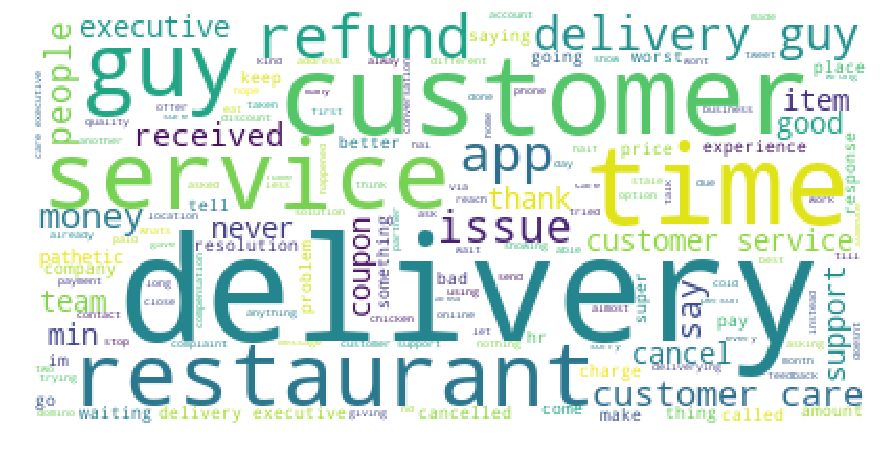

In [16]:
swiggy_word_tokens = word_tokenize(swiggy_corpus)
swiggy_corpus = ' '.join(swiggy_word_tokens)
cloud = WordCloud(background_color="white").generate(swiggy_corpus)

plt.figure(figsize=(15,15))
plt.imshow(cloud)

plt.axis('off')
plt.show()

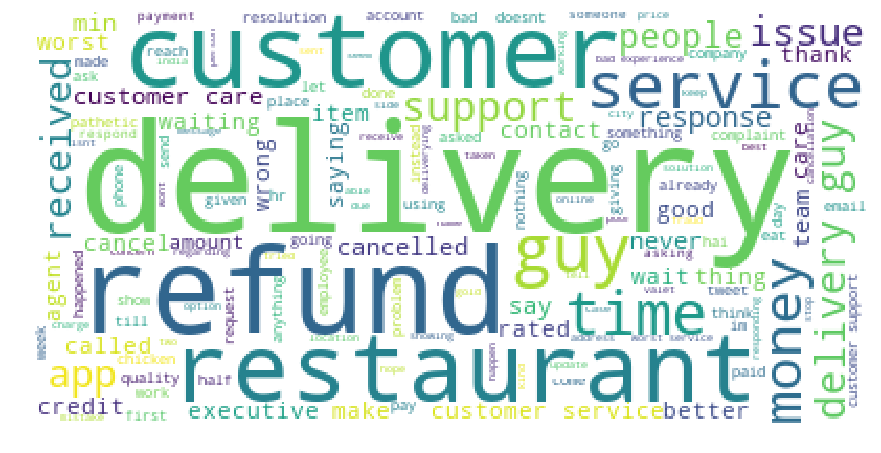

In [17]:
zomato_word_tokens = word_tokenize(zomato_corpus)
zomato_corpus = ' '.join(zomato_word_tokens)
cloud = WordCloud(background_color="white").generate(zomato_corpus)

plt.figure(figsize=(15,15))
plt.imshow(cloud)

plt.axis('off')
plt.show()

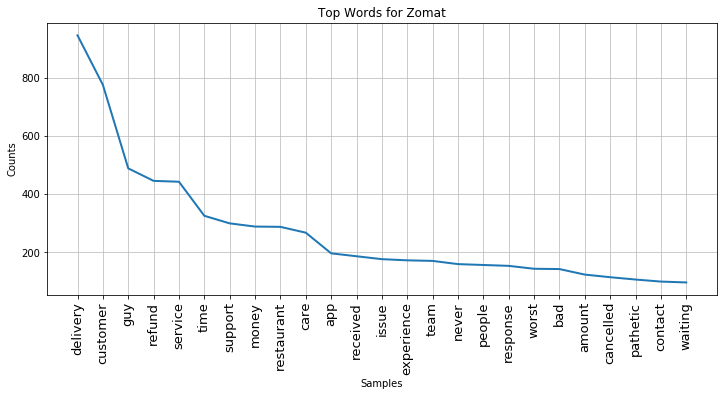

In [18]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(zomato_word_tokens)
fd.plot(25,cumulative=False, title='Top Words for Zomat')

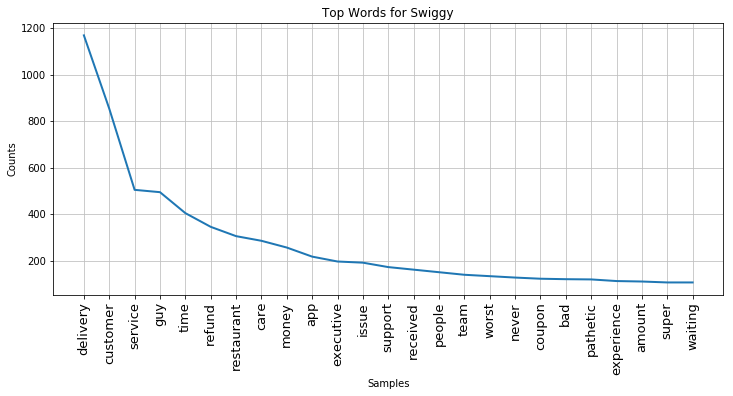

In [19]:
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(swiggy_word_tokens)
fd.plot(25,cumulative=False, title='Top Words for Swiggy')